<a href="https://colab.research.google.com/github/morfinPL/PCA/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA - Principal component analysis
---



## Requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
plt.rcParams["figure.figsize"] = (16,9)

## Data example

Why 2D only? To make visualization possible and easy, to explain idea behind method.

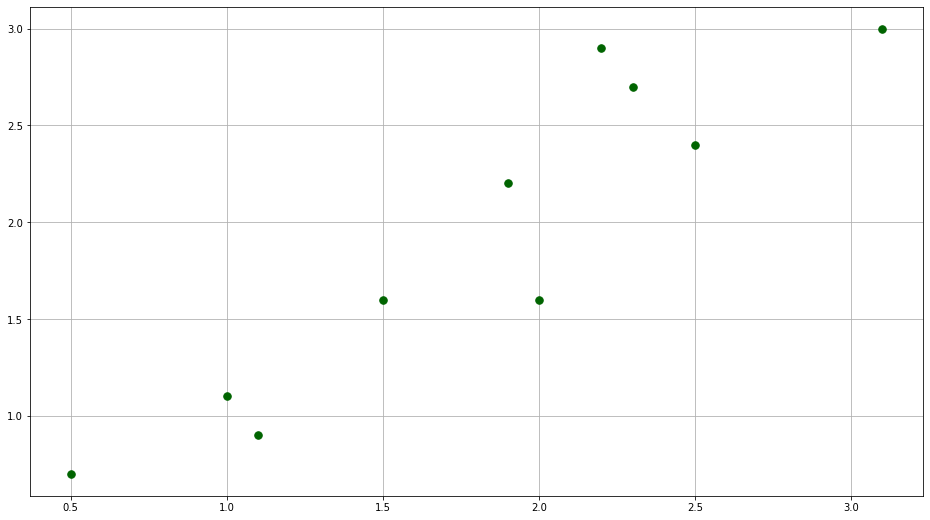

In [ ]:
dataX = np.array([ 2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2,   1,   1.5, 1.1])
dataY = np.array([ 2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])
plt.grid()
plt.plot(dataX, dataY, color='darkgreen', marker='.', linestyle='', markersize=15)

## Algorithm

### 1. Data normalization

normalizedDataX
[0.80645161 0.16129032 0.70967742 0.61290323 1.         0.74193548
 0.64516129 0.32258065 0.48387097 0.35483871]
normalizedDataY
[0.8        0.23333333 0.96666667 0.73333333 1.         0.9
 0.53333333 0.36666667 0.53333333 0.3       ]


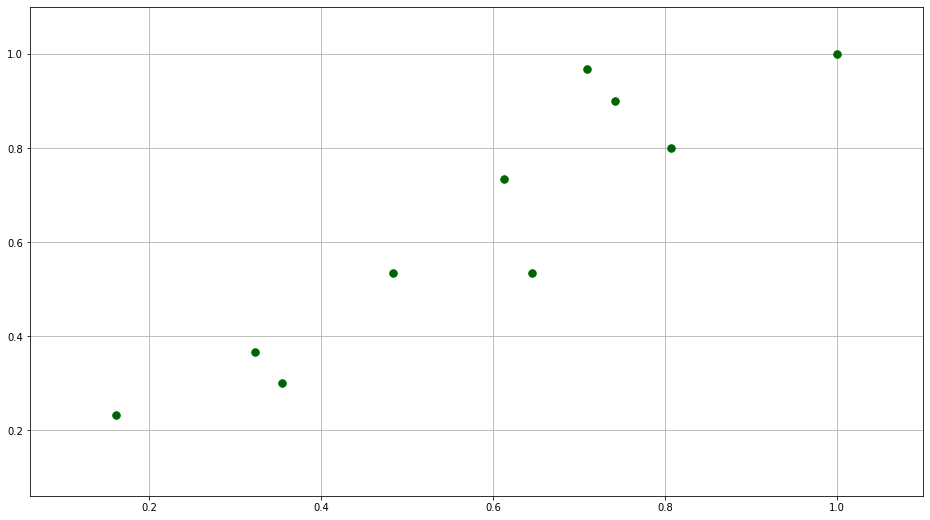

In [ ]:
normalizedDataX = normalize(dataX.reshape((1, -1)), norm='max').flatten()
normalizedDataY = normalize(dataY.reshape((1, -1)), norm='max').flatten()
print("normalizedDataX")
print(normalizedDataX)
print("normalizedDataY")
print(normalizedDataY)
plt.ylim(min(normalizedDataX) -0.1, max(normalizedDataX) +0.1) 
plt.xlim(min(normalizedDataX) -0.1, max(normalizedDataX) +0.1)
plt.grid()
plt.plot(normalizedDataX, normalizedDataY, color='darkgreen', marker='.', linestyle='', markersize=15)

### 2. Data samples distance from mean computation

zeroMeanDataX
[ 0.22258065 -0.42258065  0.12580645  0.02903226  0.41612903  0.15806452
  0.06129032 -0.26129032 -0.1        -0.22903226]
zeroMeanDataY
[ 0.16333333 -0.40333333  0.33        0.09666667  0.36333333  0.26333333
 -0.10333333 -0.27       -0.10333333 -0.33666667]


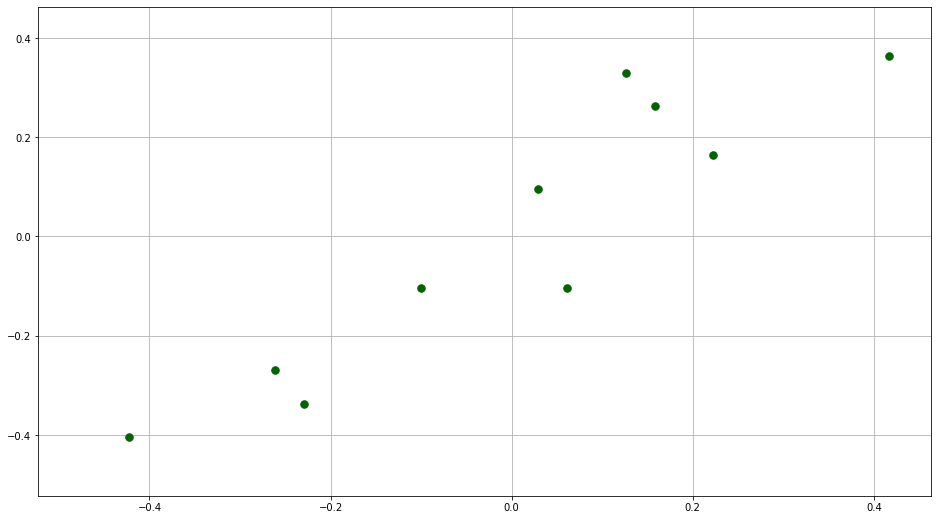

In [ ]:
zeroMeanDataX = normalizedDataX - np.mean(normalizedDataX)
zeroMeanDataY = normalizedDataY - np.mean(normalizedDataY)
print("zeroMeanDataX")
print(zeroMeanDataX)
print("zeroMeanDataY")
print(zeroMeanDataY)
plt.ylim(min(zeroMeanDataX) -0.1, max(zeroMeanDataY) +0.1) 
plt.xlim(min(zeroMeanDataX) -0.1, max(zeroMeanDataY) +0.1)
plt.grid()
plt.plot(zeroMeanDataX, zeroMeanDataY, color='darkgreen', marker='.', linestyle='', markersize=15)

### 3. Covariance matrix computation

In [ ]:
covarianceMatrix = np.cov(zeroMeanDataX, zeroMeanDataY)
print("covarianceMatrix")
print(covarianceMatrix)

covarianceMatrix
[[0.06415771 0.06617682]
 [0.06617682 0.07961728]]


### 4. Eigen values and eigen vectors computation for covariance matrix

eigenvalues
[0.13851423 0.00526076]
eigenvectors
[[-0.66482466 -0.74699944]
 [-0.74699944  0.66482466]]
transposed eigenvectors
[[-0.66482466 -0.74699944]
 [-0.74699944  0.66482466]]


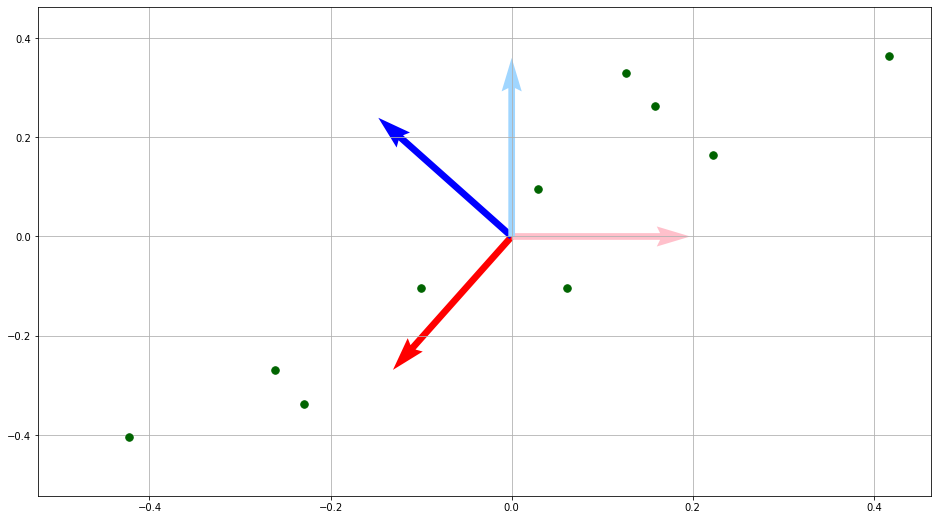

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covarianceMatrix)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
print("eigenvalues")
print(eigenvalues)
print("eigenvectors")
print(eigenvectors)
print("transposed eigenvectors")
print(eigenvectors.transpose())
origin = [0], [0]
plt.quiver(*origin, eigenvectors[:,0], eigenvectors[:,1], color=['r', 'b'], scale=5)
plt.quiver(*origin, [1,0], [0, 1], color=['#FFC0CB', '#A0D6FF'], scale=5)
plt.ylim(min(zeroMeanDataX) -0.1, max(zeroMeanDataY) +0.1)
plt.xlim(min(zeroMeanDataX) -0.1, max(zeroMeanDataY) +0.1)
plt.grid()
plt.plot(zeroMeanDataX, zeroMeanDataY, color='darkgreen', marker='.', linestyle='', markersize=15)

### 5. Projection to eigen vectors

[[-0.26998701  0.58223181 -0.33014905 -0.09151131 -0.54806264 -0.30179504
   0.03644262  0.3754021   0.14367241  0.40375611]
 [-0.05767959  0.04752156  0.12541479  0.0425793  -0.06929519  0.05699639
  -0.11448239  0.01568107  0.0060014  -0.05273734]]


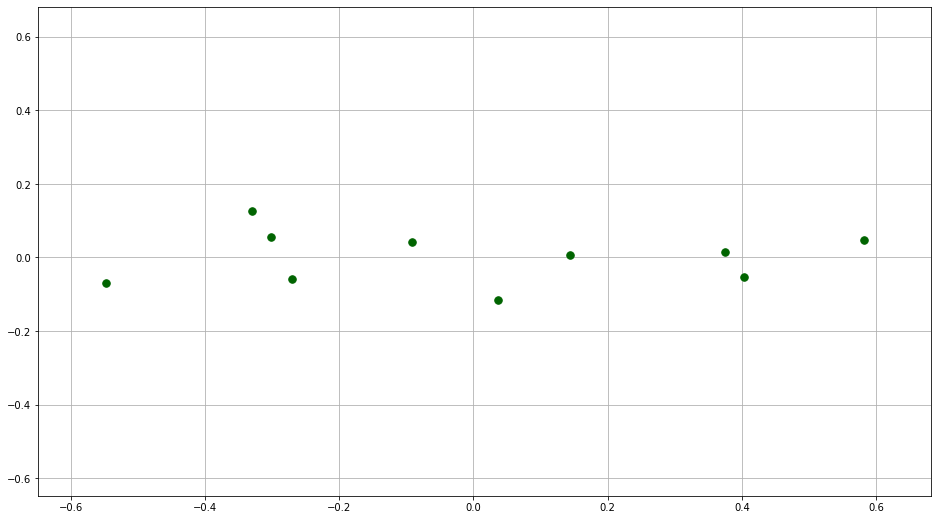

In [ ]:
transformedData = np.array([ np.dot(eigenvectors.transpose(), np.array([[zeroMeanDataX[i]], [zeroMeanDataY[i]]])) for i in range(len(zeroMeanDataX))]).reshape(10, 2).transpose()
print(transformedData)
plt.ylim(min(transformedData[0]) -0.1, max(transformedData[0]) +0.1) 
plt.xlim(min(transformedData[0]) -0.1, max(transformedData[0]) +0.1)
plt.grid()
plt.plot(transformedData[0], transformedData[1], color='darkgreen', marker='.', linestyle='', markersize=15)

## Results analysis

covariance after transformation
[[1.38514227e-01 9.18263617e-18]
 [9.18263617e-18 5.26076311e-03]]


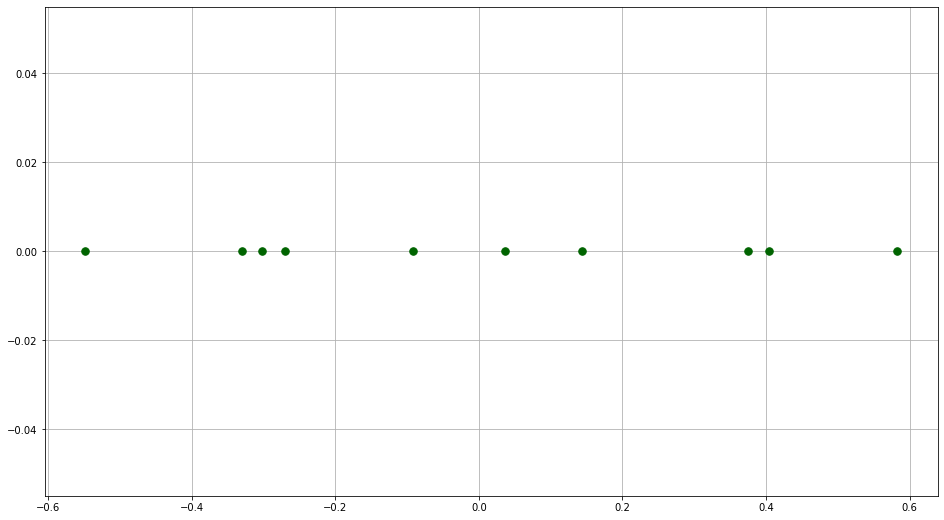

In [ ]:
print("covariance after transformation")
print(np.cov(transformedData[0], transformedData[1]))
plt.grid()
plt.plot(transformedData[0], np.zeros(len(transformedData[0])), color='darkgreen', marker='.', linestyle='', markersize=15)

## References
### 1. Lindsay I Smith, [A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf), 2002, University of Otago, Christchurch, New Zealand,
### 2. Mateusz Kowalski, [Wektory i wartości własne](http://www.kowalskimateusz.pl/wektory-i-wartosci-wlasne-eigenvalues-and-eigenvectors/), 2013.